In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.optimizers import sgd, Adam
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
data_json = pd.read_json("train.json")
data = []
for i, row in data_json.iterrows():
    band_1 = np.array(row['band_1']).reshape(75, 75)
    band_2 = np.array(row['band_2']).reshape(75, 75)
    data.append(np.dstack((band_1, band_2)))
    
target = data_json.loc[0:, ['is_iceberg']]

data_train, data_test, target_train, target_test = \
train_test_split(data, target, test_size=0.2, random_state=1)

data_train = np.asarray(data_train)
data_test = np.asarray(data_test)

data_train = data_train.astype('float32')
data_test = data_test.astype('float32')

print('data_train:', data_train.shape)
print('data_test:', data_test.shape)

data_train: (1283, 75, 75, 2)
data_test: (321, 75, 75, 2)


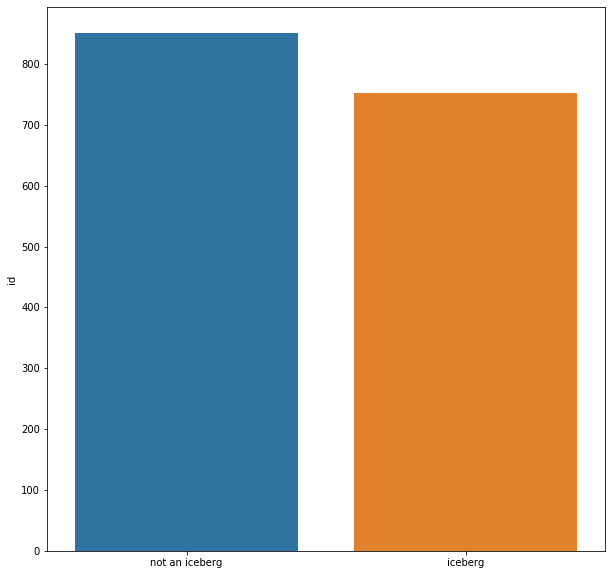

In [3]:
import seaborn as sea
plt.subplots(figsize=(10,10)) 
sea.barplot(x=['not an iceberg','iceberg'], y=data_json.groupby(['is_iceberg'],as_index=True).count()['id'])
plt.show()

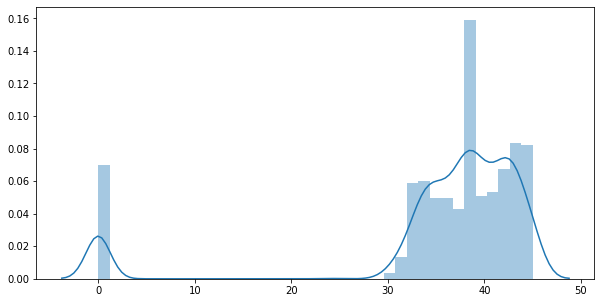

In [4]:
plt.subplots(1,1,figsize=(10,5))
angles = [int(float(var)) 
          if var!='na' 
          else 0 
          for var in data_json['inc_angle']]
data_json['intangle'] = angles
sea.distplot(angles)
plt.show()



In [5]:
ships=np.where(data_json['is_iceberg']==0)
icebergs=np.where(data_json['is_iceberg']==1)
def showimages(band,dset):
    plt.figure(figsize=(20,20))
    for i in range(8):
        plt.subplot(5,4,i+1)
        plt.xticks(())
        plt.yticks(())
        plt.imshow(np.reshape(data_json[band][dset[0][i]], (75,75)))
    plt.show()  


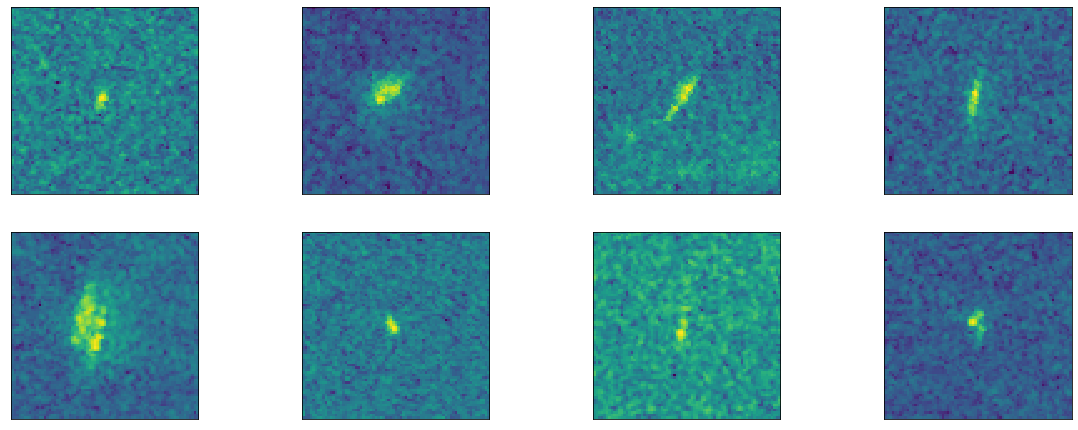

In [6]:
showimages('band_1',icebergs)


In [7]:
def showimages_sobel(band,dset,x,y):
    plt.figure(figsize=(20,20))
    for i in range(8):
        plt.subplot(5,4,i+1)
        plt.xticks(())
        plt.yticks(())
        image=np.reshape(data_json[band][dset[0][i]], (75,75))
        image_x=signal.convolve2d(image,x,mode='valid')
        image_y=signal.convolve2d(image,y,mode='valid')
        image_filtered=np.hypot(image_x,image_y)
        plt.imshow((image_filtered))
    plt.show()


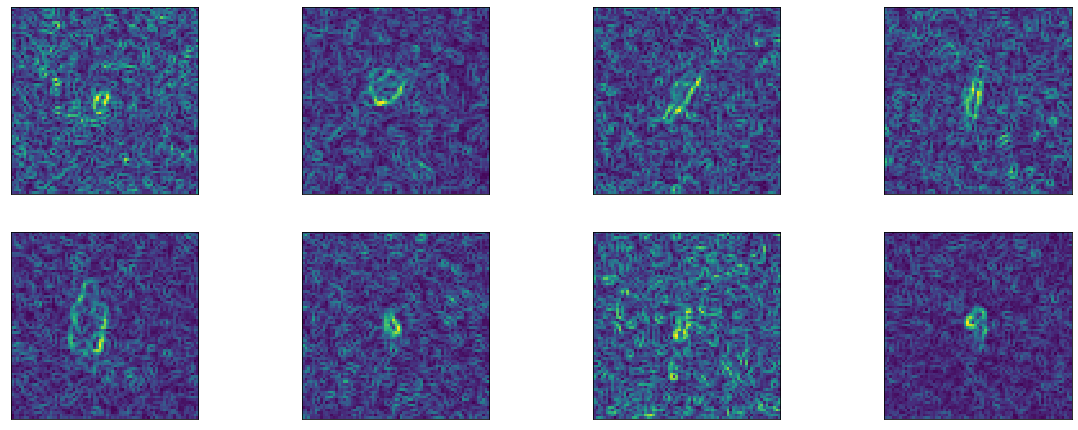

In [8]:
from scipy import signal
x_sobel=np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
y_sobel=np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
showimages_sobel('band_1',icebergs,x_sobel,y_sobel)


In [9]:
def showimages_sobel_avg(band,dset,avg,x,y):
    plt.figure(figsize=(20,20))
    for i in range(8):
        plt.subplot(5,4,i+1)
        plt.xticks(())
        plt.yticks(())
        image=np.reshape(data_json[band][dset[0][i]], (75,75))
        img_avg=signal.convolve2d(image,avg,mode='valid')
        image_x=signal.convolve2d(img_avg,x,mode='valid')
        image_y=signal.convolve2d(img_avg,y,mode='valid')
        image_filtered=np.hypot(image_x,image_y)
        
        plt.imshow((image_filtered))
    plt.show()


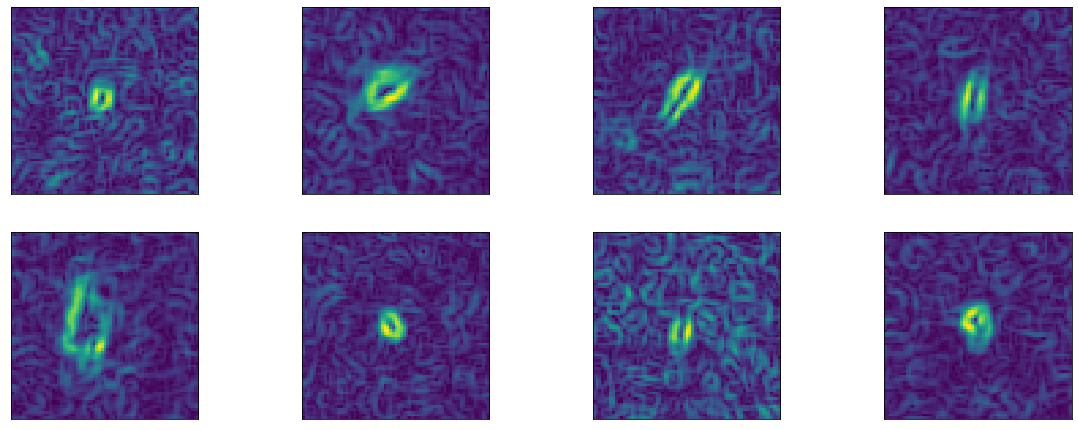

In [10]:
avg=np.ones((5,5))
showimages_sobel_avg('band_1',icebergs,avg,x_sobel,y_sobel)


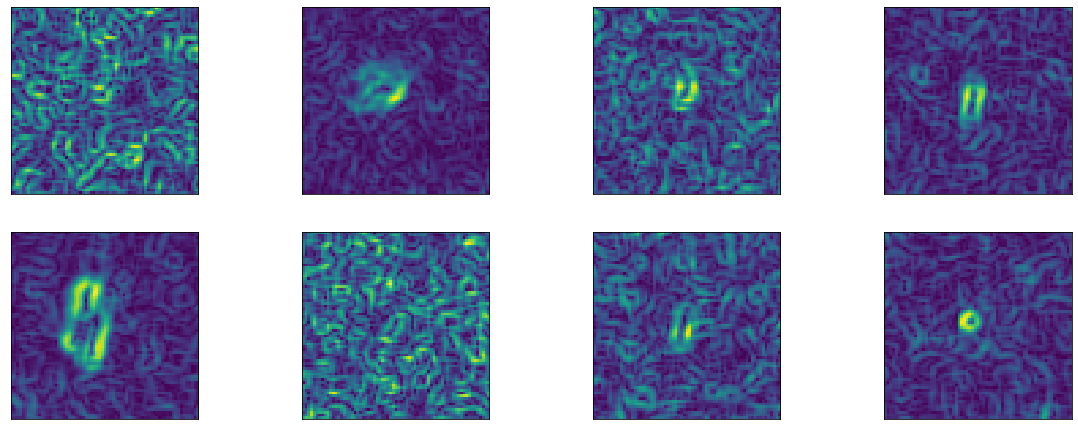

In [11]:
showimages_sobel_avg('band_2',icebergs,avg,x_sobel,y_sobel)


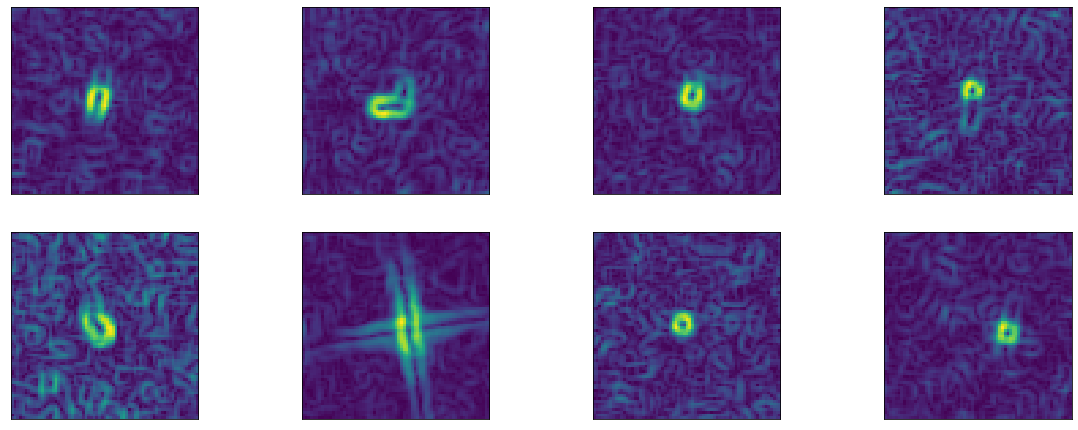

In [12]:
showimages_sobel_avg('band_1',ships,avg,x_sobel,y_sobel)


In [13]:
convNN = Sequential()

convNN.add(Conv2D(16, (5, 5), strides = (1, 1), padding='same', input_shape=(75, 75, 2)))
convNN.add(Activation('relu'))

convNN.add(Conv2D(32, (3, 3), strides = (3, 3)))
convNN.add(Activation('relu'))
convNN.add(MaxPooling2D(pool_size=(2, 2)))
convNN.add(Dropout(0.2))

convNN.add(Conv2D(100, (2, 2), strides = (2, 2)))
convNN.add(Activation('relu'))
convNN.add(MaxPooling2D(pool_size=(2, 2)))
convNN.add(Dropout(0.22))

convNN.add(Flatten())

convNN.add(Dense(100))
convNN.add(Activation('relu'))

convNN.add(Dense(50))
convNN.add(Activation('relu'))
convNN.add(Dropout(0.2))

convNN.add(Dense(1))
convNN.add(Activation('sigmoid'))

convNN.summary()

W0624 22:42:54.055829 13688 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0624 22:42:54.083794 13688 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0624 22:42:54.090790 13688 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0624 22:42:54.138782 13688 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0624 22:42:54.143760 13688 deprecation_wrapper.py:119] From C:\ProgramData\Ana

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 75, 75, 16)        816       
_________________________________________________________________
activation_1 (Activation)    (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 32)        4640      
_________________________________________________________________
activation_2 (Activation)    (None, 25, 25, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 100)         12900     
__________

In [14]:
batch_size = 32
epochs = 30

optimizer_adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

convNN.compile(loss='binary_crossentropy', optimizer=optimizer_adam, metrics=['accuracy'])

run_hist_adam = convNN.fit(data_train, target_train, batch_size=batch_size, epochs=epochs,
                          validation_data=(data_test, target_test), shuffle=True, 
                          verbose=1)

W0624 22:42:54.364634 13688 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0624 22:42:54.372630 13688 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0624 22:42:54.386623 13688 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 1283 samples, validate on 321 samples
Epoch 1/30
1283/1283 [==============================] - 6s 5ms/step - loss: 0.8555 - acc: 0.5378 - val_loss: 0.6305 - val_acc: 0.6075
Epoch 2/30
1283/1283 [==============================] - 5s 4ms/step - loss: 0.6037 - acc: 0.6329 - val_loss: 0.5509 - val_acc: 0.6916
Epoch 3/30
1283/1283 [==============================] - 5s 4ms/step - loss: 0.5370 - acc: 0.6812 - val_loss: 0.5080 - val_acc: 0.7103
Epoch 4/30
1283/1283 [==============================] - 6s 4ms/step - loss: 0.5341 - acc: 0.6882 - val_loss: 0.4700 - val_acc: 0.7601
Epoch 5/30
1283/1283 [==============================] - 5s 4ms/step - loss: 0.4853 - acc: 0.7311 - val_loss: 0.4668 - val_acc: 0.7664
Epoch 6/30
1283/1283 [==============================] - 5s 4ms/step - loss: 0.4535 - acc: 0.7693 - val_loss: 0.3801 - val_acc: 0.8224
Epoch 7/30
1283/1283 [==============================] - 5s 4ms/step - loss: 0.4383 - acc: 0.7810 - val_loss: 0.3618 - val_acc: 0.8349
Epoch 8/30
1283

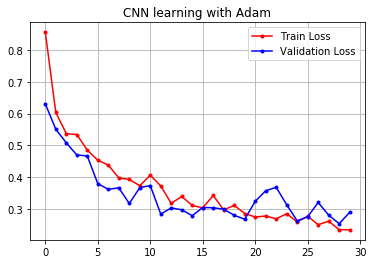

In [15]:
plt.plot(run_hist_adam.history["loss"], 'r', marker='.', label="Train Loss")
plt.plot(run_hist_adam.history["val_loss"], 'b', marker='.', label="Validation Loss")
plt.title("CNN learning with Adam")
plt.legend()
plt.grid()

In [16]:
scores = convNN.evaluate(data_test, target_test, verbose=True)
print('Test accuracy:', scores[1])

321/321 [==============================] - 0s 1ms/step
Test accuracy: 0.8660436137071651


In [17]:
predicted = convNN.predict(data_test)
number_of_elements = 8

for i in range (0, number_of_elements):
    element = random.randint(0, predicted.size-1)
    print('Number of predicted element: ', element)
    print('predicted as: ', predicted[element])
    print('real class is :', target_test.iloc[element, 0])
    print('')

Number of predicted element:  206
as:  [0.]
real class is : 0

Number of predicted element:  119
as:  [0.08117539]
real class is : 0

Number of predicted element:  317
as:  [0.65086937]
real class is : 1

Number of predicted element:  175
as:  [0.26152238]
real class is : 0

Number of predicted element:  144
as:  [0.]
real class is : 0

Number of predicted element:  282
as:  [0.99860156]
real class is : 1

Number of predicted element:  40
as:  [0.3035717]
real class is : 0

Number of predicted element:  61
as:  [0.5080632]
real class is : 0

